<a href="https://colab.research.google.com/github/Lalit767/Expedia_Case_Study/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87856 entries, 0 to 87855
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                87856 non-null  object
 1   Geographic Region   87856 non-null  object
 2   Platform            87856 non-null  object
 3   Marketing Channel   87856 non-null  object
 4   Visits              87856 non-null  int64 
 5   Qualified Shoppers  87856 non-null  int64 
 6   Bounced Visits      87856 non-null  int64 
 7   Gross Orders        87856 non-null  int64 
 8   Net Orders          87856 non-null  int64 
 9   Net Room Nights     87856 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 6.7+ MB


<ipython-input-11-1c57b4f04221>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-11-1c57b4f04221>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.to_period('M')
<ipython-input-11-1c57b4f04221>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

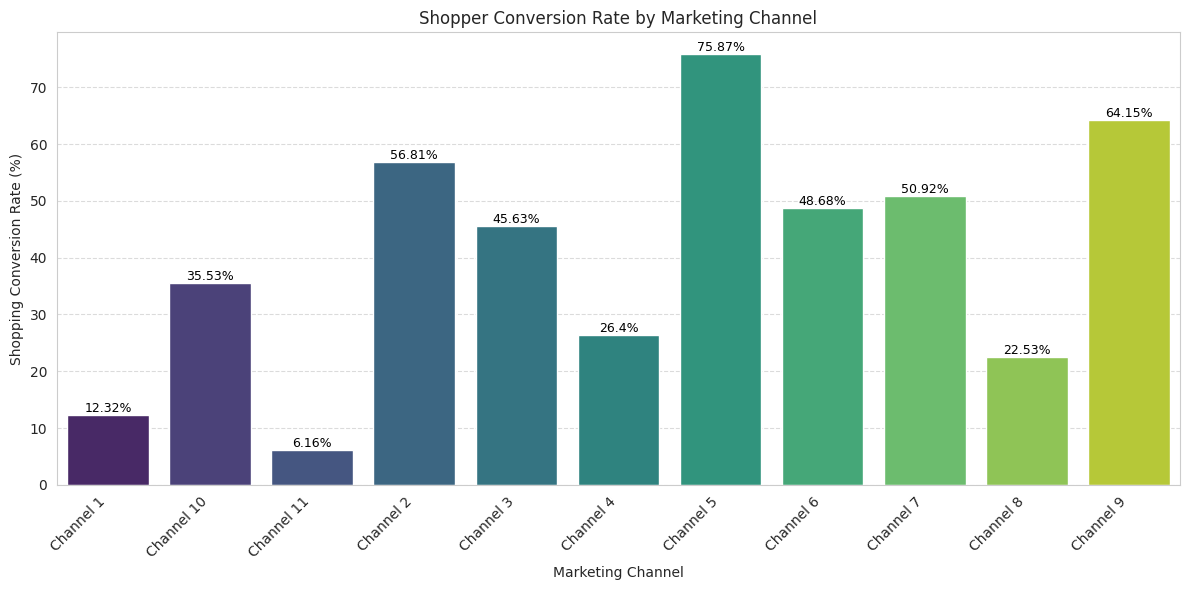

Lalit    Marketing Channel     Visits  Qualified Shoppers  Net Orders  \
0          Channel 1  208844879            25726696     7148408   
1         Channel 10    8644707             3071655      224077   
2         Channel 11       1428                  88         -10   
3          Channel 2  796085540           452279999    46558752   
4          Channel 3  264598021           120733990     7398841   
5          Channel 4   51905636            13704071      437793   
6          Channel 5   64146633            48667697     4052206   
7          Channel 6  341439745           166226031     5176644   
8          Channel 7  325392356           165674964     6148956   
9          Channel 8  247384701            55742977     2761843   
10         Channel 9  128262658            82277785     2463976   

    Net Room Nights  Shopper Conversion Rate (%)  Visits (M)  \
0          15718133                        12.32      208.84   
1            558039                        35.53        8.64 

<ipython-input-11-1c57b4f04221>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


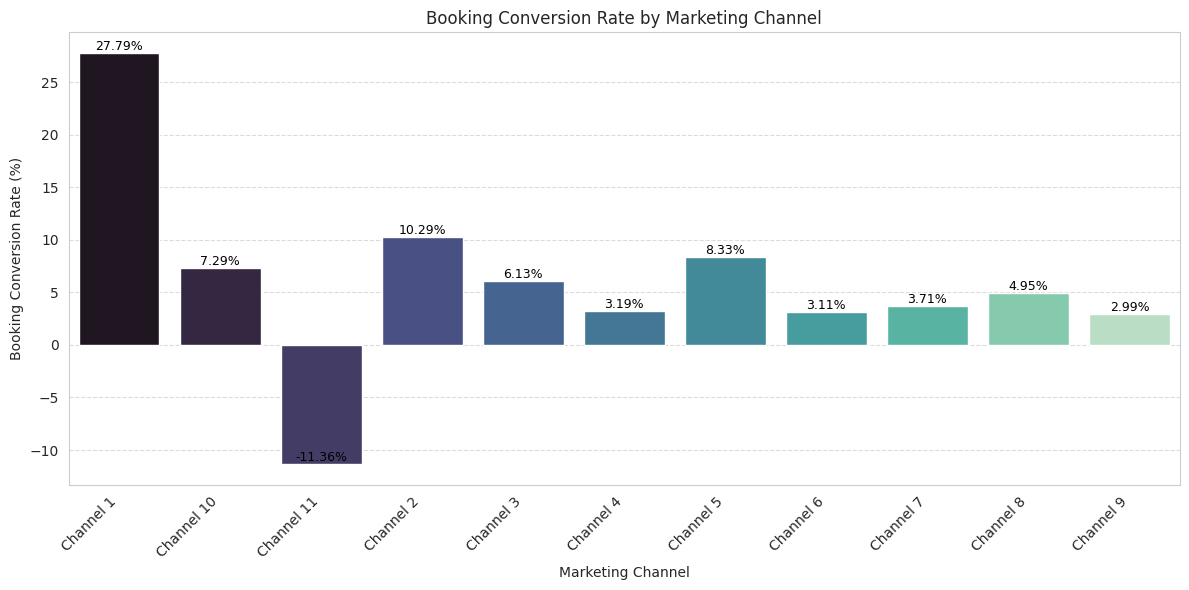

<ipython-input-11-1c57b4f04221>:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


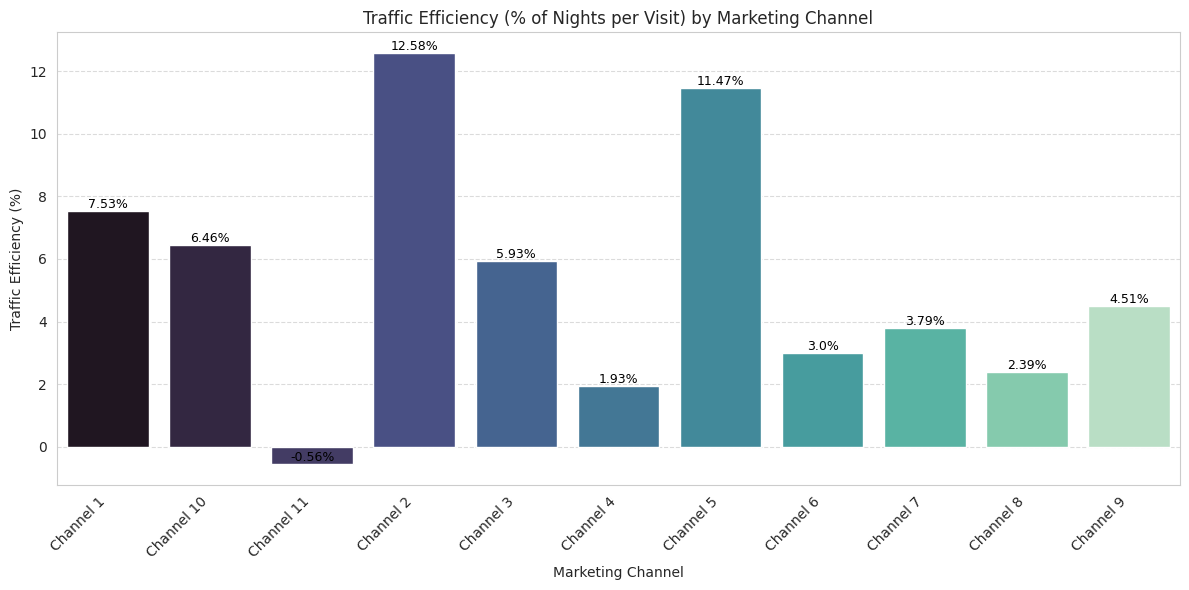

<ipython-input-11-1c57b4f04221>:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


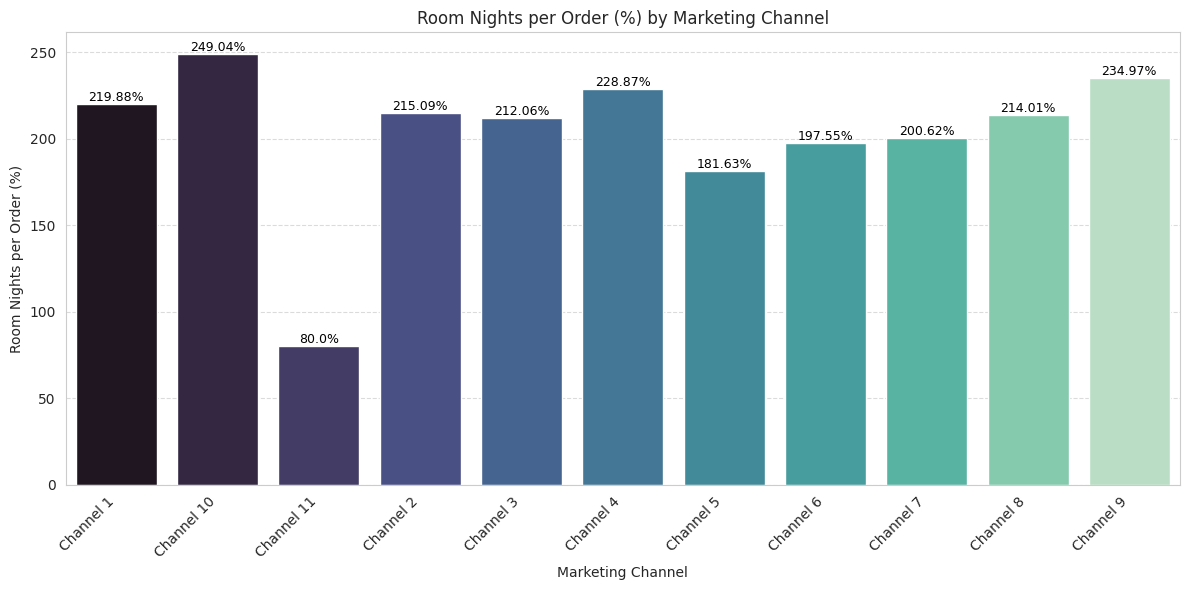

<ipython-input-11-1c57b4f04221>:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(


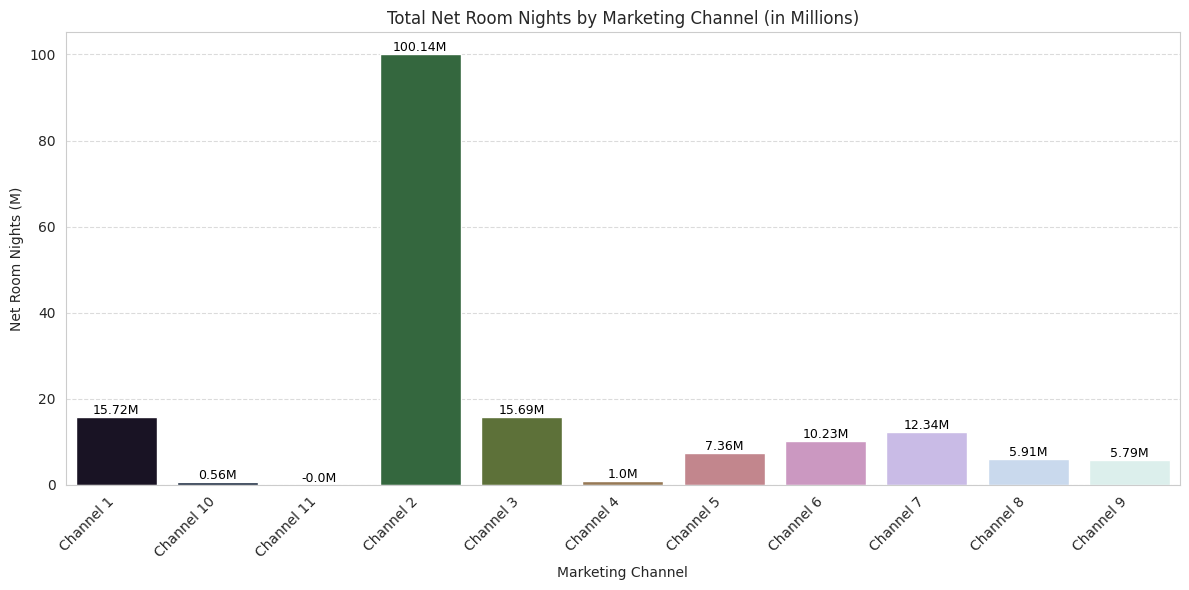

<ipython-input-11-1c57b4f04221>:258: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(


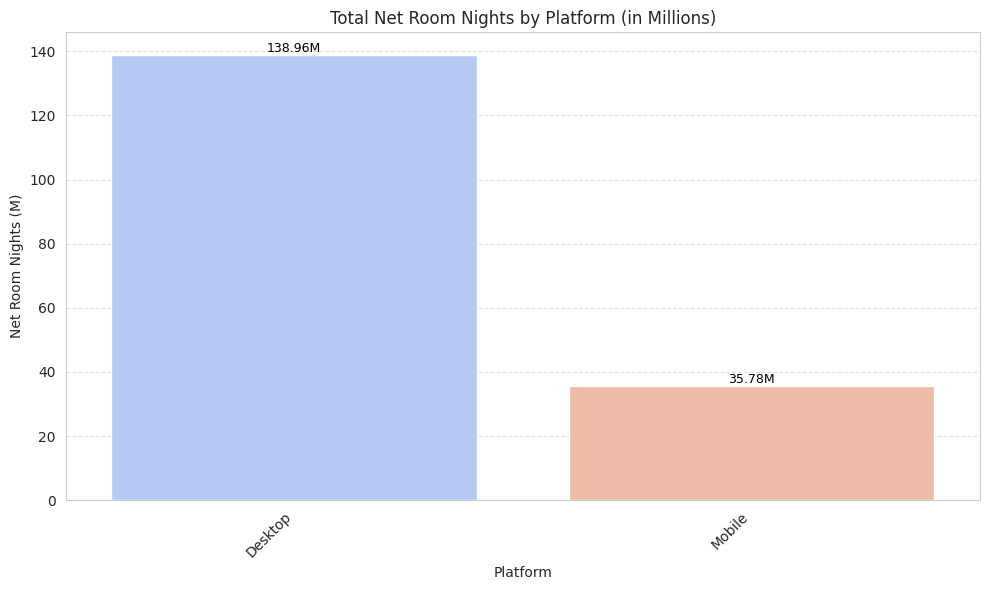

<ipython-input-11-1c57b4f04221>:297: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(


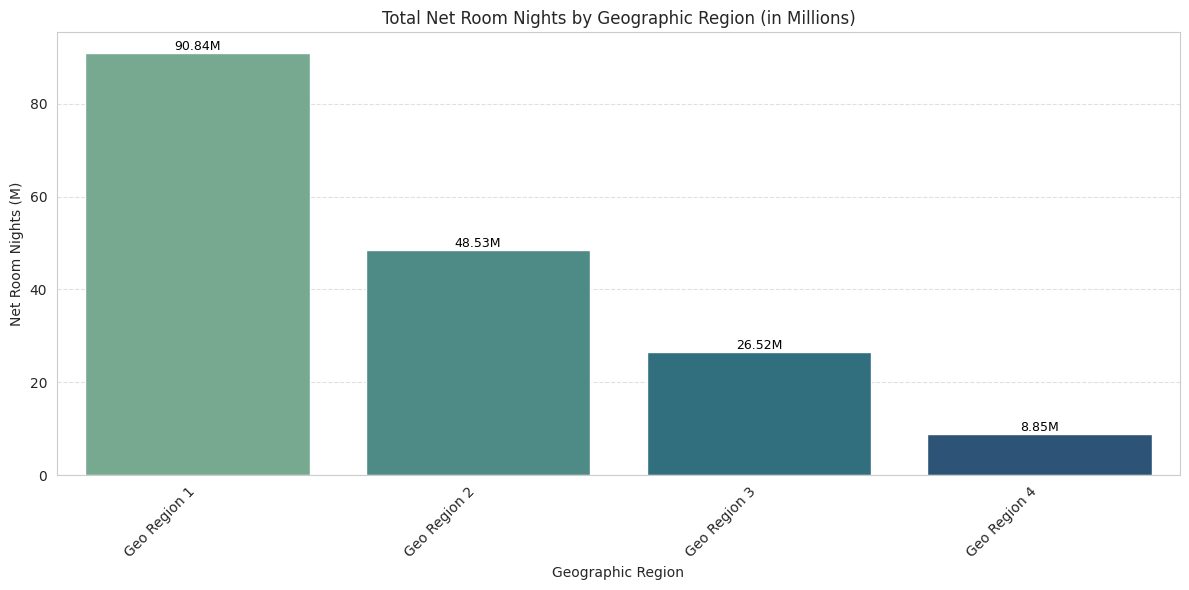

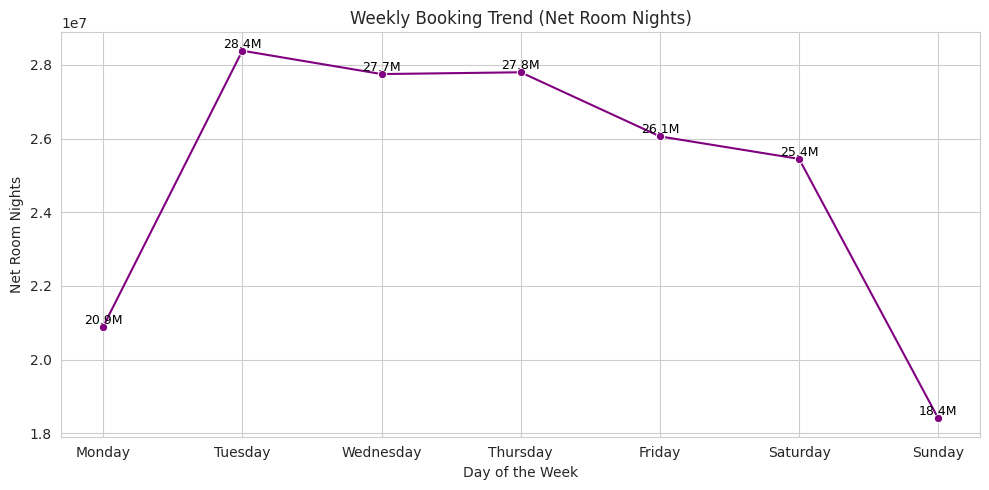

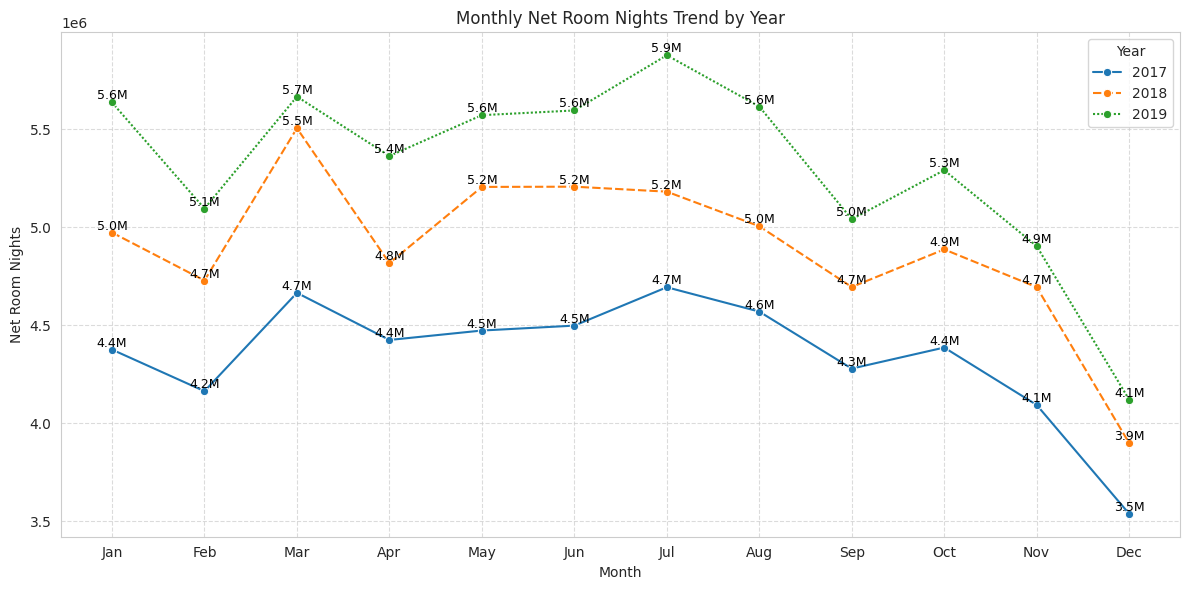

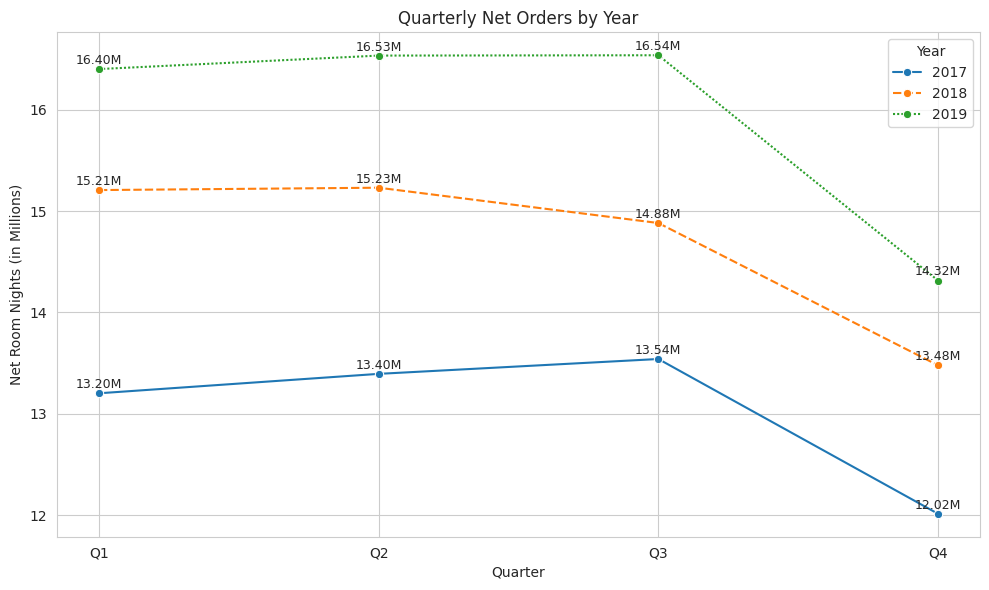

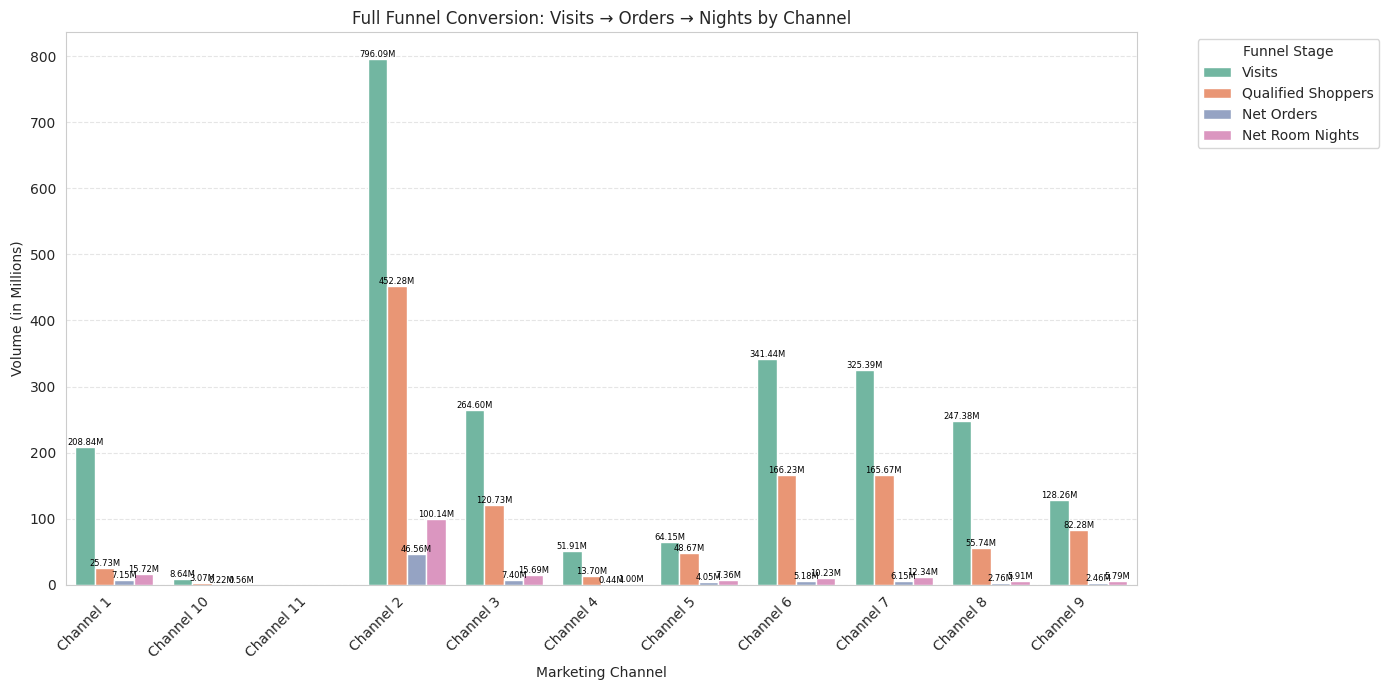

In [11]:
#Exploratory Data Analysis

# Load Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("/content/HCOM_Analytics_Insights_Case_Study_Dataset.csv")

# ----`Data Information ------
df.info()
df.describe()

# Remove rows with invalid dates
df = df[pd.to_datetime(df['Date'], errors='coerce').notna()].copy()


# Remove duplicate rows
df = df.drop_duplicates()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create derived COLUMNS ---
df['Month'] = df['Date'].dt.to_period('M')
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])
df["Day"] = df["Date"].dt.date
df["Weekday"] = df["Date"].dt.day_name()
df["Quarter"] = df["Date"].dt.to_period("Q").astype(str)
df["Year"] = df["Date"].dt.year

# Group by Marketing Channel
channel_summary = df.groupby("Marketing Channel").agg({
    "Visits": "sum",
    "Qualified Shoppers": "sum",
    "Net Orders": "sum",
    "Net Room Nights": "sum"
}).reset_index()

#print("Test",channel_summary)

# Group by Platform
platform_summary = df.groupby("Platform").agg({
    "Visits": "sum",
    "Qualified Shoppers": "sum",
    "Net Orders": "sum",
    "Net Room Nights": "sum"
}).reset_index()

# Group by Geography Region
Geographic_summary = df.groupby("Geographic Region").agg({
    "Visits": "sum",
    "Qualified Shoppers": "sum",
    "Net Orders": "sum",
    "Net Room Nights": "sum"
}).reset_index()


#-----Traffic Quality-------------------------------------
# Calculate Shopper Conversion Rate (%)
channel_summary["Shopper Conversion Rate (%)"] = (
    channel_summary["Qualified Shoppers"] / channel_summary["Visits"].replace(0, 1)
) * 100
channel_summary["Shopper Conversion Rate (%)"] = channel_summary["Shopper Conversion Rate (%)"].round(2)
channel_summary["Visits (M)"] = (channel_summary["Visits"] / 1e6).round(2)

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=channel_summary,
    x="Marketing Channel",
    y="Shopper Conversion Rate (%)",
    palette="viridis"
)

# Customize plot
plt.xticks(rotation=45, ha='right')
plt.title("Shopper Conversion Rate by Marketing Channel")
plt.ylabel("Shopping Conversion Rate (%)")
plt.xlabel("Marketing Channel")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add percentage labels on top of bars
for i, row in channel_summary.iterrows():
    ax.text(
        x=i,
        y=row["Shopper Conversion Rate (%)"],
        s=f'{row["Shopper Conversion Rate (%)"]}%',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.show()
# Channels 5 and 9 attract highly qualified shoppers. Channel 1 drives many visits but with very low quality (12.3% conversion)

#--------Customer Engagement (Booking Conversion Rate)-----
# 1.Calculate Booking Conversion Rate (%)
channel_summary["Booking Conversion Rate (%)"] = (
    channel_summary["Net Orders"] / channel_summary["Qualified Shoppers"].replace(0, 1)
) * 100
channel_summary["Booking Conversion Rate (%)"] = channel_summary["Booking Conversion Rate (%)"].round(2)


# Sort if needed (optional)
# channel_summary = channel_summary.sort_values(by="Booking Conversion Rate (%)", ascending=False)
print("Lalit",channel_summary)
# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=channel_summary,
    x="Marketing Channel",
    y="Booking Conversion Rate (%)",
    palette="mako"
)

# Titles and labels
plt.title("Booking Conversion Rate by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Booking Conversion Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add data point labels
for i, row in channel_summary.iterrows():
    ax.text(
        x=i,
        y=row["Booking Conversion Rate (%)"],
        s=f'{row["Booking Conversion Rate (%)"]}%',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.show()

# 2.Calculate Traffic Efficiency as a percentage
channel_summary["Traffic Efficiency (%)"] = (
    (channel_summary["Net Room Nights"] / channel_summary["Visits"].replace(0, 1)) * 100
).round(2)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=channel_summary,
    x="Marketing Channel",
    y="Traffic Efficiency (%)",
    palette="mako"
)

# Titles and labels
plt.title("Traffic Efficiency (% of Nights per Visit) by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Traffic Efficiency (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add percentage labels on bars
for i, row in channel_summary.iterrows():
    ax.text(
        x=i,
        y=row["Traffic Efficiency (%)"],
        s=f'{row["Traffic Efficiency (%)"]}%',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.show()

# 3.Calculate Room Nights per Order as a percentage
channel_summary["Room Nights per Order (%)"] = ((channel_summary["Net Room Nights"] / channel_summary["Net Orders"].replace(0, 1)) * 100).round(2)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=channel_summary,
    x="Marketing Channel",
    y="Room Nights per Order (%)",
    palette="mako"
)

# Titles and labels
plt.title("Room Nights per Order (%) by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Room Nights per Order (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add data point labels
for i, row in channel_summary.iterrows():
    ax.text(
        x=i,
        y=row["Room Nights per Order (%)"],
        s=f'{row["Room Nights per Order (%)"]}%',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.show()


# #Channel 1, despite low shopper quality, performs best in turning shoppers into bookings — likely strong UX or retargeting. Channels 4, 6, 9 have weak engagement (under 3.5%).

#----Marketing Channel Performance------
channel_summary["Total Net Room Nights"]=channel_summary["Net Room Nights"]/1000000
channel_summary["Total Net Room Nights"] = channel_summary["Total Net Room Nights"].round(2)

# Plot
plt.figure(figsize=(12, 6))
ax=sns.barplot(
    data=channel_summary,
    x="Marketing Channel",
    y="Total Net Room Nights",
    palette="cubehelix"
)

# Titles and labels
plt.title("Total Net Room Nights by Marketing Channel (in Millions)")
plt.ylabel("Net Room Nights (M)")
plt.xlabel("Marketing Channel")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Add data point labels
for i, row in channel_summary.iterrows():
    ax.text(
        x=i,
        y=row["Total Net Room Nights"],
        s=f'{row["Total Net Room Nights"]}M',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
plt.show()

# #Channel 2 is the strongest volume driver despite only moderate conversion — likely due to large-scale traffic (branding/search ads).

#-------Device Usage (Platform Trends)------
platform_summary["Total Net Room Nights"]=platform_summary["Net Room Nights"]/1000000
platform_summary["Total Net Room Nights"] = platform_summary["Total Net Room Nights"].round(2)

# Plot
plt.figure(figsize=(10, 6))
ax=sns.barplot(
    data=platform_summary,
    x="Platform",
    y="Total Net Room Nights",
    palette="coolwarm"
)

# Titles and labels
plt.title("Total Net Room Nights by Platform (in Millions)")
plt.xlabel("Platform")
plt.ylabel("Net Room Nights (M)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
# Add data point labels
for i, row in platform_summary.iterrows():
    ax.text(
        x=i,
        y=row["Total Net Room Nights"],
        s=f'{row["Total Net Room Nights"]}M',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
plt.show()

# Desktop accounts for ~80% of Net Room Nights. Either mobile traffic converts poorly or booking flow is not optimized for mobile.


#-------Geography Region Trends------
Geographic_summary["Total Net Room Nights"]=Geographic_summary["Net Room Nights"]/1000000
Geographic_summary["Total Net Room Nights"] = Geographic_summary["Total Net Room Nights"].round(2)

# Sort for better readability
geo_sorted = Geographic_summary.sort_values(by="Total Net Room Nights", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ax=sns.barplot(
    data=geo_sorted,
    x="Geographic Region",
    y="Total Net Room Nights",
    palette="crest"
)

# Titles and labels
plt.title("Total Net Room Nights by Geographic Region (in Millions)")
plt.xlabel("Geographic Region")
plt.ylabel("Net Room Nights (M)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
# Add data point labels
for i, row in geo_sorted.iterrows():
    ax.text(
        x=i,
        y=row["Total Net Room Nights"],
        s=f'{row["Total Net Room Nights"]}M',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
plt.show()

# #Geo Region 1 contributes ~50% of bookings. Consider focusing marketing spend or A/B testing initiatives here for highest ROI.

#-------Performance Patterns & Seasonality---------------------
#Daily & Weekly Fluctuation – Line Plot by Weekday

# Group by weekday and sum Net Room Nights
weekday_trends = df.groupby("Weekday")["Net Room Nights"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Plot
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=weekday_trends, marker="o", color="purple")
plt.title("Weekly Booking Trend (Net Room Nights)")
plt.xlabel("Day of the Week")
plt.ylabel("Net Room Nights")
plt.grid(True)
plt.tight_layout()

# Add value labels (in millions)
for i, (day, value) in enumerate(weekday_trends.items()):
    ax.text(
        x=i,
        y=value,
        s=f'{value/1e6:.1f}M',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.show()


# Monthly Seasonality – Line Plot by Month and year
# Group and aggregate Net Room Nights by Year and Month
df['MonthName'] = df['Date'].dt.strftime('%b')
# Group by Year and MonthName
monthly_trends = df.groupby(['Year', 'MonthName'])['Net Room Nights'].sum().reset_index()

# Define proper month order
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert MonthName to ordered category
monthly_trends['MonthName'] = pd.Categorical(
    monthly_trends['MonthName'],
    categories=month_order,
    ordered=True
)

# Sort the dataframe
monthly_trends = monthly_trends.sort_values(['MonthName', 'Year'])

# Pivot: months as index, years as columns
pivot_trends = monthly_trends.pivot(index='MonthName', columns='Year', values='Net Room Nights')

# Plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=pivot_trends, marker='o')
plt.title("Monthly Net Room Nights Trend by Year")
plt.xlabel("Month")
plt.ylabel("Net Room Nights")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Year')

# Add value labels to each point
for year in pivot_trends.columns:
    for i, value in enumerate(pivot_trends[year]):
        if pd.notna(value):
            month = pivot_trends.index[i]
            ax.text(
                x=month,
                y=value,
                s=f'{value/1e6:.1f}M',
                ha='center',
                va='bottom',
                fontsize=9,
                color='black'
            )

plt.tight_layout()
plt.show()

#-----Quarterly Seasonality – Line Plot by Quarter and year
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Group and convert to millions
df["Quarter"] = pd.to_datetime(df["Date"]).dt.to_period("Q").astype(str).str[-2:]  # Extract 'Q1', 'Q2', etc.
df["Year"] = pd.to_datetime(df["Date"]).dt.year
quarterly_trends = df.groupby(["Year", "Quarter"])["Net Room Nights"].sum().reset_index()
quarterly_trends["Net Room Nights (M)"] = quarterly_trends["Net Room Nights"] / 1_000_000

# Set correct order for plotting
quarterly_trends["Quarter"] = pd.Categorical(quarterly_trends["Quarter"], categories=quarter_order, ordered=True)

# Pivot for plotting
pivot_trends = quarterly_trends.pivot(index="Quarter", columns="Year", values="Net Room Nights (M)").sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.lineplot(data=pivot_trends, marker='o')

plt.title("Quarterly Net Orders by Year")
plt.ylabel("Net Room Nights (in Millions)")
plt.xlabel("Quarter")
plt.xticks(rotation=0)

# Add data labels
for year in pivot_trends.columns:
    for x, y in pivot_trends[year].items():
        if pd.notna(y):
            ax.text(x=x, y=y + 0.05, s=f'{y:.2f}M', ha='center', fontsize=9)

plt.legend(title='Year')
plt.tight_layout()
plt.show()


# Sample setup - assuming channel_summary is already created
# and includes Visits, Qualified Shoppers, Net Orders, Net Room Nights

# Prepare funnel data
funnel_data = channel_summary.melt(
    id_vars='Marketing Channel',
    value_vars=['Visits', 'Qualified Shoppers', 'Net Orders', 'Net Room Nights'],
    var_name='Funnel Stage',
    value_name='Count'
)

# Convert values to millions
funnel_data['Count (M)'] = (funnel_data['Count'] / 1e6).round(2)

# Plot grouped bar chart
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=funnel_data,
    x='Marketing Channel',
    y='Count (M)',
    hue='Funnel Stage',
    palette='Set2'
)

# Add data labels to each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=height,
            s=f'{height:.2f}M',
            ha='center',
            va='bottom',
            fontsize=6,
            color='black'
        )

# Customize plot
plt.title("Full Funnel Conversion: Visits → Orders → Nights by Channel")
plt.ylabel("Volume (in Millions)")
plt.xlabel("Marketing Channel")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Funnel Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')